### Return & Risk Calculation

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data, wb
NSE_SCRIPT = data.DataReader(name='AARTIIND.NS', data_source='yahoo',start='2000-01-01')

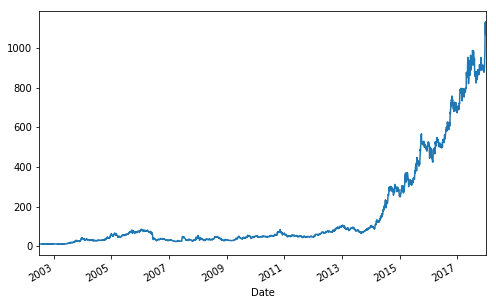

In [3]:
%matplotlib inline
NSE_SCRIPT['Close'].plot(figsize=(8, 5))

#### Using np.log 

In [4]:
NSE_SCRIPT['Ret_Loop'] = 0.0
for i in range(1, len(NSE_SCRIPT)):
    NSE_SCRIPT['Ret_Loop'][i] = np.log(NSE_SCRIPT['Close'][i] /NSE_SCRIPT['Close'][i - 1])

In [5]:
NSE_SCRIPT[['Close', 'Ret_Loop']].tail()

,Close,Ret_Loop
Date,,
2017-12-22,1129.500000,0.079722
2017-12-26,1117.300049,-0.010860
2017-12-27,1076.900024,-0.036829
2017-12-28,1069.199951,-0.007176
2017-12-29,1133.900024,0.058752


#### Above Loop can be replaced with 1 line code as below
#### Note : usage of shift for T-1 record

In [6]:
NSE_SCRIPT['Return'] = np.log(NSE_SCRIPT['Close'] / NSE_SCRIPT['Close'].shift(1)) #Same as above loop
NSE_SCRIPT[['Close', 'Ret_Loop', 'Return']].tail()

,Close,Ret_Loop,Return
Date,,,
2017-12-22,1129.500000,0.079722,0.079722
2017-12-26,1117.300049,-0.010860,-0.010860
2017-12-27,1076.900024,-0.036829,-0.036829
2017-12-28,1069.199951,-0.007176,-0.007176
2017-12-29,1133.900024,0.058752,0.058752


#### Plotting Volatility

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022715B4B438>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000022715B79BE0>], dtype=object)

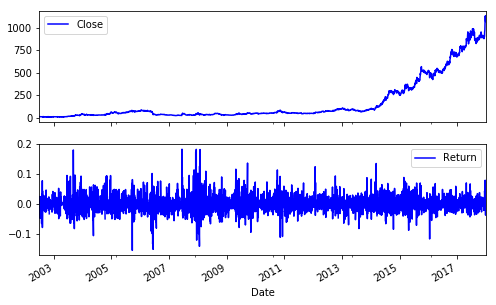

In [7]:
NSE_SCRIPT[['Close', 'Return']].plot(subplots=True, style='b',figsize=(8, 5))